**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("nullranges")))
suppressMessages(suppressWarnings(library("coin")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

fcc_starrmpra_vote2_v1 
fcc_starrmpra_vote2_v2_split_pool_by_tss 
fcc_starrmpracrispri_vote2_phenograph_neighbors070 
List_MatchedRanges.rds 
region.prepare.annotation.tsv 
region.prepare.covariate.tsv 
region.prepare.group.tsv 
region.prepare.score.tsv 
results.enrich.fcc_active_vs_inactive.perm_n10k.rds 
results.enrich.fcc_active_vs_inactive.perm_n10k.tsv 


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpra_vote2_v2_split_pool_by_tss"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

CombineGRanges_ProximalActive_ProximalInactive.rds 
MatchedGRanges_DistalActive_DistalInactive.rds 
MatchedGRanges_DistalRepressive_DistalInactive.rds 
MatchedGRanges_ProximalRepressive_ProximalInactive.rds 
region.prepare.focal.tsv 
region.prepare.pool.tsv 


In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpra_vote2_v2_split_pool_by_tss"
)

###
txt_fname = "MatchedGRanges_DistalActive_DistalInactive.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

obj = readRDS(txt_fpath)
mgr_region_distal_active = obj

###
txt_fname = "MatchedGRanges_DistalRepressive_DistalInactive.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

obj = readRDS(txt_fpath)
mgr_region_distal_repressive = obj

###
txt_fname = "MatchedGRanges_ProximalRepressive_ProximalInactive.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

obj = readRDS(txt_fpath)
mgr_region_proximal_repressive = obj

###
txt_fname = "CombineGRanges_ProximalActive_ProximalInactive.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

obj = readRDS(txt_fpath)
lst_region_proximal_active = obj

**Check**

Picking joint bandwidth of 0.0133



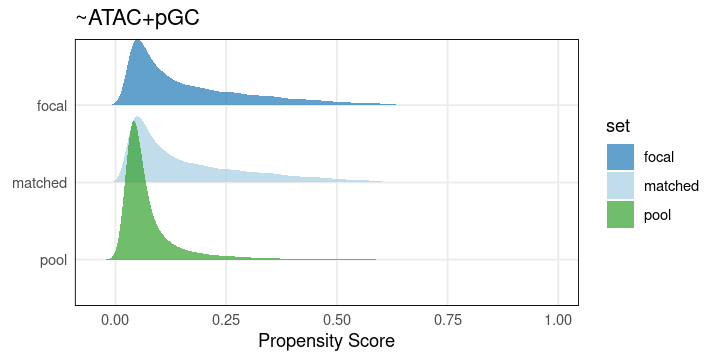

In [6]:
mgr = mgr_region_distal_active
options(repr.plot.height=3, repr.plot.width=6)
plotPropensity(mgr, sets = c('f', 'p', 'm'), type = 'ridges')

## Import score matrix

In [7]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2"
)
txt_fname = "region.prepare.score.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041    531


Region,Chrom,ChromStart,ChromEnd,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,ADNP,AFF1,AFF4,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CC2D1A,CCAR2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2E2,GTF2F1,GTF2I,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGXB4,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MED1,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POU5F1,PPARD,PRDM10,PREB,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,RERE,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,SRSF9,STAG1,STAT5A,STAT5B,STAT6,SUPT5H,SUZ12,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB43,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF317,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF609,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
chr1:100028014-100029653,chr1,100028014,100029653,0.9324294,1.202217,0.3674175,1.1781314,1.510638,0.6818927,0.5918414,0.3212089,1.029036,0.8262739,0.7740098,0.7672098,0.8427633,1.064127,0.8741887,0.7658377,1.1074736,1.230418,1.2129801,1.1746429,1.068918,1.122291,1.072180,1.040072,1.0371645,0.8600184,0.9397841,0.9097831,1.111118,0.9432657,0.9021195,0.6405099,0.8116826,1.219258,0.7836813,0.9983948,0.7364291,0.7803210,0.7953946,1.077510,0.5255708,0.9541040,0.9522851,0.8264350,0.8831594,1.136329,0.9576375,0.2835662,1.048814,0.9989313,1.494201,0.6854639,1.105886,0.8536292,0.9571677,0.6584455,0.7976522,1.111108,0.8890226,1.047161,1.055973,0.9962615,1.3697066,0.8387445,0.7607898,1.233440,1.0198300,1.031557,0

## Arrange score matrix

In [8]:
dat = mat_region_score_import
dat = dat %>% dplyr::select(-Chrom, -ChromStart, -ChromEnd) %>% column_to_rownames("Region")
mat_region_score = dat
head(dat, 3)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,⋯,ZNF84,ZSCAN29,ZSCAN32,ZZZ3,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.93242936,1.202217,0.3674175,1.1781314,1.510638,0.6818927,0.5918414,0.3212089,1.029037,0.8262739,⋯,1.0330670,0.9713258,0.8083307,1.123223,-0.2125505,-0.21446960,0,0.000000,0,-0.7757209
chr1:100036895-100039189,2.89957396,3.910099,0.4091536,1.1978119,1.069881,4.9478111,5.5219678,4.1772959,4.663171,0.9431997,⋯,1.1498056,1.2491389,1.0451144,1.033166,1.7130117,-0.05130039,0,1.832751,0,2.2235590
chr1:100046252-100046533,0.04290946,1.091537,0.4388560,0.5386822,2.148905,1.2418524,1.1294906,3.5795422,1.101003,1.6372764,⋯,0.7301539,1.1432014,1.1482769,1.394350,-1.6867521,0.00000000,0,0.000000,0,-1.2221295


In [40]:
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
print(vec_txt_assay)

[1] "ASTARR"         "WSTARR"         "TMPRA"          "LMPRA"         
[5] "CRISPRi-HCRFF"  "CRISPRi-Growth"


In [41]:
dat = mat_region_score
vec = colnames(dat)
vec = setdiff(vec, vec_txt_assay)

vec_txt_feature = vec
print(length(vec))
print(head(vec))
print(tail(vec))

[1] 521
[1] "H2AFZ"    "H3K27ac"  "H3K27me3" "H3K36me3" "H3K4me1"  "H3K4me2" 
[1] "ZNF83"   "ZNF830"  "ZNF84"   "ZSCAN29" "ZSCAN32" "ZZZ3"   


## Prepare for test

In [11]:
mgr = mgr_region_distal_active
class(mgr)

[1] "MatchedGRanges"
attr(,"package")
[1] "nullranges"

In [30]:
class(focal(mgr))

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [47]:
lst = list()
lst[["DistalActive"]]       = mgr_region_distal_active
lst[["DistalRepressive"]]   = mgr_region_distal_repressive
lst[["ProximalRepressive"]] = mgr_region_proximal_repressive

lst = lapply(lst, function(mgr){
    vec_txt_region_focal = focal(mgr)
    vec_txt_region_pool  = matched(mgr)
    
    tmp = list(
        "focal" = vec_txt_region_focal,
        "pool"  = vec_txt_region_pool
    )
    return(tmp)
})

lst[["ProximalActive"]] = lst_region_proximal_active

lst_combine_region = lst

In [48]:
lst = lst_combine_region
for (tmp in lst){
    vec1 = tmp$focal$Region
    vec2 = tmp$pool$Region
    
    cat(class(tmp), "\n")
    cat(class(vec1), "\n")
}

list 
character 
list 
character 
list 
character 
list 
character 


In [49]:
lst = lst_combine_region
lst = lapply(lst, function(tmp){
    ### init
    dat  = mat_region_score

    ###
    vec1 = tmp$focal$Region
    vec2 = tmp$pool$Region
    dat1 = dat[vec1,]
    dat2 = dat[vec2,]
    
    ###
    dat1$Group = "1"
    dat2$Group = "0"
    dat = bind_rows(dat1, dat2)

    return(dat)
})

lst_dat_region = lst

In [50]:
lst = lst_dat_region
for (dat in lst){print(dim(dat))}

[1] 23246   528
[1] 3280  528
[1] 218 528
[1] 9541  528


## Test all features foreach targeted cluster

In [52]:
### init: parameters and seed
num_iter = 10000
#num_iter = 2
set.seed(123)

### loop through each region group
for (txt_group in names(lst_dat_region)){
    ### show progress
    dat = lst_dat_region[[txt_group]]
    cat("Group:  ", txt_group, "\n")
    cat("#Region:", nrow(dat), "\n")
    flush.console()
    
    ### test for each feature
    lst = lapply(vec_txt_feature, function(txt_feature){
        
        ### select the feature and group lable
        dat = lst_dat_region[[txt_group]]
        vec = c(txt_feature, "Group")
        dat = dat[, vec]
        colnames(dat) = c("Score", "Group")
    
        ### perform a permutation test
        dat = dat %>% dplyr::mutate(Group = factor(Group, levels = c("1", "0")))
        res = coin::oneway_test(
            Score ~ Group, 
            data = dat, 
            distribution = approximate(nresample = num_iter)
        )

        return(res)
    })
    names(lst) = vec_txt_feature
    lst_fit_object = lst   

    ### save results
    txt_fdiry = file.path(
        FD_RES, 
        "region_integration",
        "fcc_astarr_macs_input_overlap",
        "analysis_enrichment_v2",
        "fcc_starrmpra_vote2_v2_split_pool_by_tss"
    )
    txt_fname = paste("results", txt_group, "perm10k", sep = "_")
    txt_fname = paste(txt_fname, "rds", sep = ".")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    cat("Saved:", txt_fname, "\n")
    obj = lst_fit_object
    saveRDS(obj, txt_fpath)
    cat("\n")   
}

Group:   DistalActive 
#Region: 23246 
Saved: results_DistalActive_perm10k.rds 

Group:   DistalRepressive 
#Region: 3280 
Saved: results_DistalRepressive_perm10k.rds 

Group:   ProximalRepressive 
#Region: 218 
Saved: results_ProximalRepressive_perm10k.rds 

Group:   ProximalActive 
#Region: 9541 
Saved: results_ProximalActive_perm10k.rds 

